The code in the cell below runs a Python script to create a diabetes dataset.

In [ ]:
!python /content/create_diabetes_dataset.py

Creating Synthetic Diabetes Risk Dataset
Generating 1000 synthetic patient records...
✅ Dataset saved as 'diabetes_risk_dataset.csv'
📊 Dataset shape: (1000, 6)


#Importing Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
df = pd.read_csv("/content/diabetes_risk_dataset.csv")
df.head()

,age,bmi,systolic_bp,glucose_level,family_history,diabetes_risk
0,52.5,25.1,121,104,0,Moderate
1,42.9,22.3,98,81,0,Low
2,54.7,28.1,125,76,0,Low
3,67.8,33.4,153,126,1,High
4,41.5,19.7,108,81,0,Low


In [ ]:
list(df.columns)

['age',
 'bmi',
 'systolic_bp',
 'glucose_level',
 'family_history',
 'diabetes_risk']

In [ ]:
df.describe()

,age,bmi,systolic_bp,glucose_level,family_history
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,45.410800,26.82150,114.113000,100.287000,0.301000
std,14.283017,4.13137,15.782564,16.044502,0.458922
min,18.000000,16.00000,90.000000,70.000000,0.000000
25%,35.275000,23.97500,102.000000,89.000000,0.000000
50%,45.400000,26.90000,113.000000,100.000000,0.000000
75%,54.700000,29.70000,124.000000,111.000000,1.000000
max,85.000000,40.80000,166.000000,152.000000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["diabetes_risk"]  = label_encoder.fit_transform(df["diabetes_risk"])

In [ ]:
df.head()

,age,bmi,systolic_bp,glucose_level,family_history,diabetes_risk
0,52.5,25.1,121,104,0,2
1,42.9,22.3,98,81,0,1
2,54.7,28.1,125,76,0,1
3,67.8,33.4,153,126,1,0
4,41.5,19.7,108,81,0,1


In [ ]:
df.isna().sum()

,0
age,0
bmi,0
systolic_bp,0
glucose_level,0
family_history,0
diabetes_risk,0


There are No missing values.

#Handeling Outliers

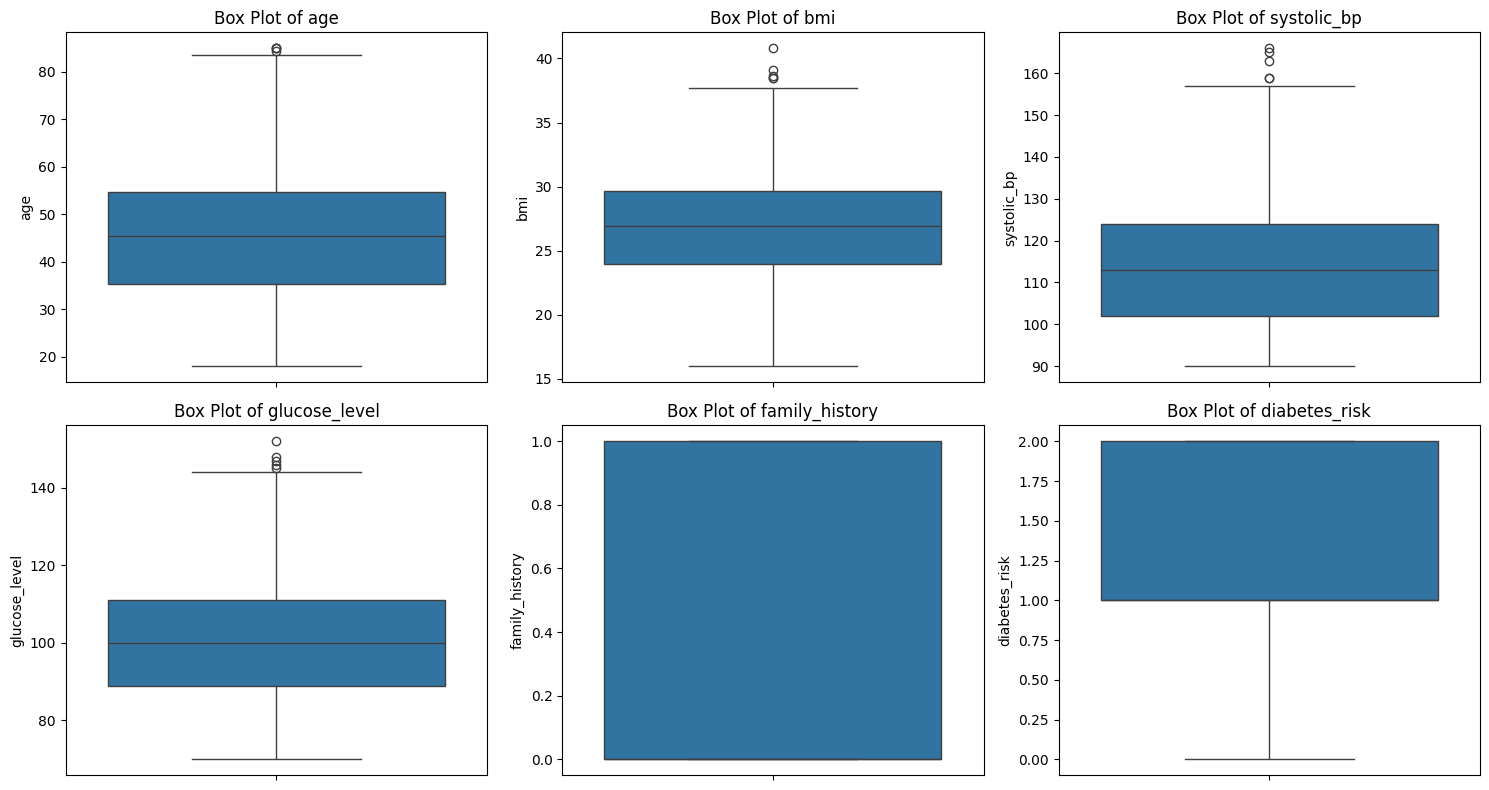

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

columns = df.columns.tolist()
num_columns = len(columns)
num_rows = math.ceil(num_columns / 3) # Arrange in 3 columns
plt.figure(figsize=(15, num_rows * 4)) # Adjust figure size based on number of rows

for i, column in enumerate(columns):
  plt.subplot(num_rows, 3, i + 1)
  sns.boxplot(y=df[column]) # Use y for vertical box plots
  plt.title(f'Box Plot of {column}')
  plt.ylabel(column) # Use ylabel for vertical box plots

plt.tight_layout()
plt.show()

While the box plots for BMI, systolic blood pressure, and glucose level show some data points that appear to be outliers based on statistical measures, it's important to note that within a medical context, these values might not be considered clinically significant outliers and could represent genuine variations in patient data.

# Task
Understanding the distribution of a column in a dataframe.

## Choose a column

### Subtask:
Select the column for which you want to visualize the distribution.


**Reasoning**:
List the columns of the dataframe to identify potential columns for distribution analysis.



In [ ]:
print(df.columns.tolist())

['age', 'bmi', 'systolic_bp', 'glucose_level', 'family_history', 'diabetes_risk']


## Visualize the distribution

### Subtask:
Generate a plot (e.g., histogram, box plot) to visualize the distribution of the selected column.


**Reasoning**:
Create a histogram to visualize the distribution of the 'age' column.



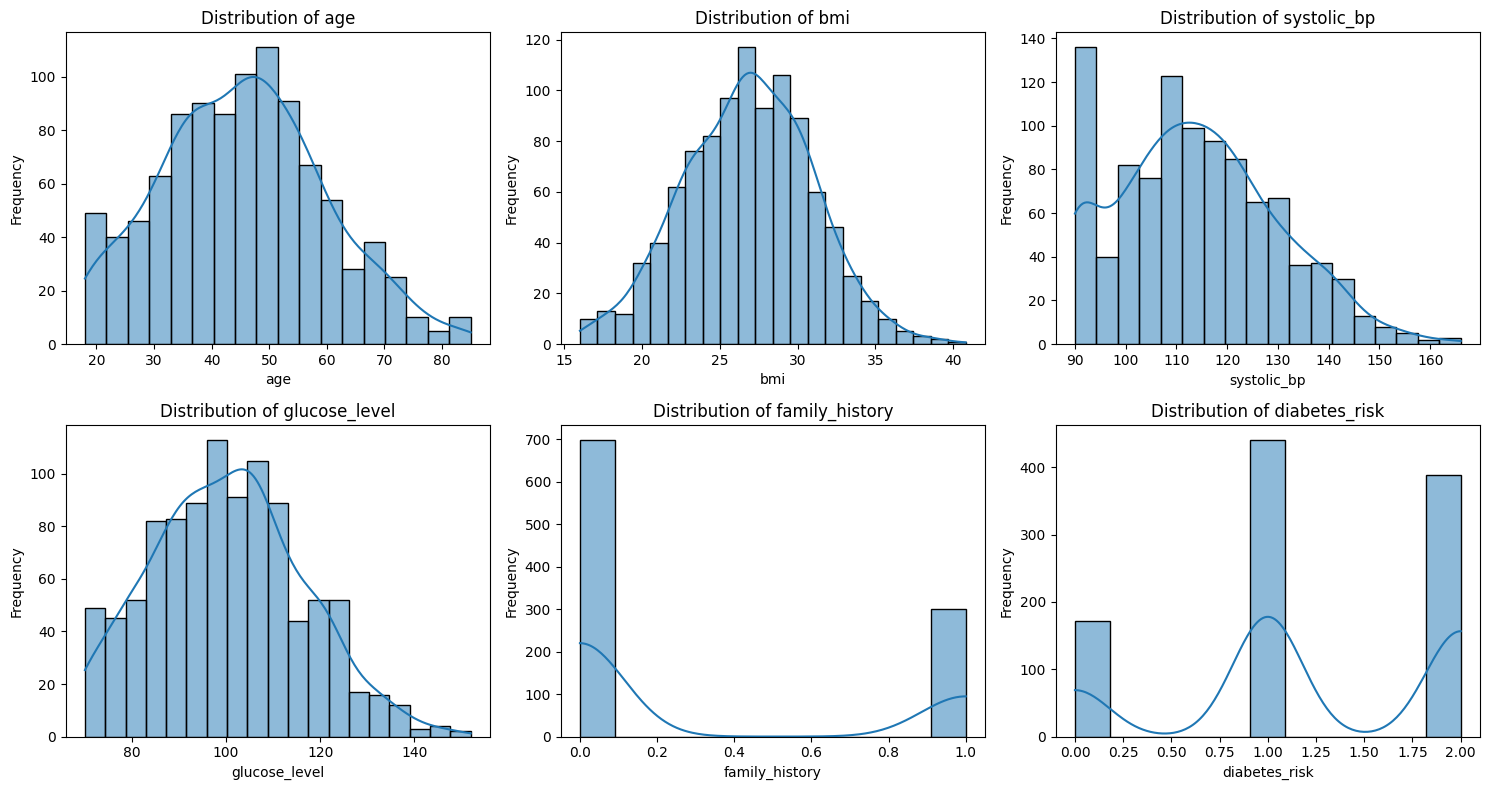

In [ ]:
import math

columns = df.columns.tolist()
num_columns = len(columns)
num_rows = math.ceil(num_columns / 3)
plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(columns):
  plt.subplot(num_rows, 3, i + 1)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

age: The distribution appears somewhat bell-shaped, but slightly skewed towards older ages, which is expected in a dataset related to health conditions like diabetes risk, as risk generally increases with age. The peak seems to be around the 40s to 50s.


bmi: The BMI distribution also looks somewhat like a bell curve, centered around the mid-20s to low 30s.


systolic_bp: This distribution shows a peak around 110-120 mmHg, which is within the normal blood pressure range. There's a tail extending towards higher values, representing individuals with elevated blood pressure.

glucose_level: The glucose level distribution is also somewhat bell-shaped, centered around 100 mg/dL, which is a typical fasting blood sugar level. There's a spread indicating variations in glucose levels within the dataset.


family_history: This is a binary feature. The histogram shows that a larger proportion of individuals in the dataset do not have a family history of diabetes (represented by 0) compared to those who do (represented by 1).


diabetes_risk: After label encoding, this categorical target variable shows the distribution across the three risk categories (Low, Moderate, High, mapped to 0, 1, and 2 based on the previous label encoding output). The distribution appears somewhat balanced across the categories, though the "Moderate" and "High" risk categories seem to have slightly more individuals than the "Low" risk category. This suggests that the dataset is not heavily imbalanced, which is good for training a classification model.

In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,bmi,systolic_bp,glucose_level,family_history,diabetes_risk
age,1.000000,0.226385,0.760611,0.384976,0.042278,-0.174959
bmi,0.226385,1.000000,0.454484,0.483636,0.051914,-0.095303
systolic_bp,0.760611,0.454484,1.000000,0.394136,0.028606,-0.194261
glucose_level,0.384976,0.483636,0.394136,1.000000,0.441775,-0.110189
family_history,0.042278,0.051914,0.028606,0.441775,1.000000,-0.068001
diabetes_risk,-0.174959,-0.095303,-0.194261,-0.110189,-0.068001,1.000000


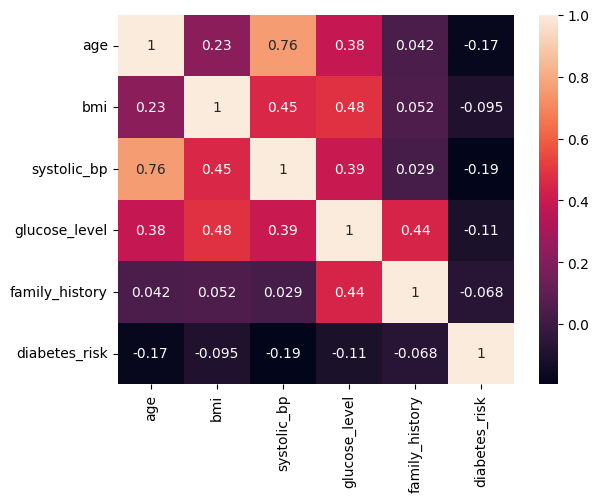

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

Strong Positive Correlations:
age and systolic_bp: There is a strong positive correlation (0.76) between age and systolic blood pressure. This suggests that as age increases, systolic blood pressure tends to increase as well, which is a known medical trend.

bmi and glucose_level: There is a moderate positive correlation (0.48) between BMI and glucose level. This aligns with medical understanding that higher BMI can be associated with higher blood sugar levels.

Moderate Positive Correlations:
age and glucose_level: There is a moderate positive correlation (0.38) between age and glucose level.
bmi and systolic_bp: There is a moderate positive correlation (0.45) between BMI and systolic blood pressure.
glucose_level and family_history: There is a moderate positive correlation (0.44) between glucose level and family history of diabetes. This indicates that having a family history is associated with higher glucose levels.

#Modeling

In [ ]:
df.columns

Index(['age', 'bmi', 'systolic_bp', 'glucose_level', 'family_history',
       'diabetes_risk'],
      dtype='object')

In [ ]:
y = df["diabetes_risk"]
X= df.drop("diabetes_risk", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( n_estimators = 100, random_state =42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred= model.predict(X_test)
dict_metrics={}
dict_metrics["accuracy"] = accuracy_score(y_test, y_pred)
dict_metrics["precision"] = precision_score(y_test, y_pred, average="weighted")
dict_metrics["recall"] = recall_score(y_test, y_pred, average="weighted")
dict_metrics["f1_score"] = f1_score(y_test, y_pred, average="weighted")
dict_metrics


{'accuracy': 0.835,
 'precision': 0.8376537015222907,
 'recall': 0.835,
 'f1_score': 0.835780247504901}

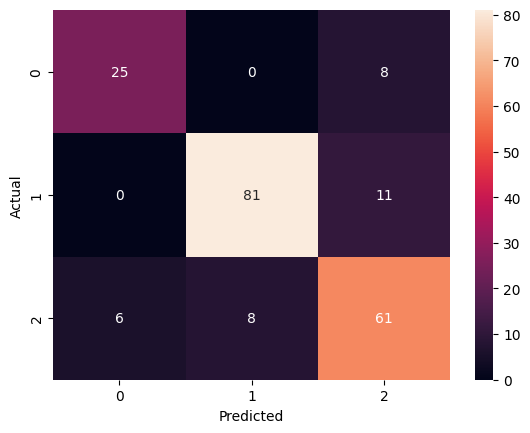

In [ ]:
m=confusion_matrix(y_test, y_pred)
sns.heatmap(m, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", random_state= 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred= model.predict(X_test)
dict_metrics={}
dict_metrics["accuracy"] = accuracy_score(y_test, y_pred)
dict_metrics["precision"] = precision_score(y_test, y_pred, average="weighted")
dict_metrics["recall"] = recall_score(y_test, y_pred, average="weighted")
dict_metrics["f1_score"] = f1_score(y_test, y_pred, average="weighted")
dict_metrics


{'accuracy': 0.835,
 'precision': 0.8393604390681003,
 'recall': 0.835,
 'f1_score': 0.8354721011333914}

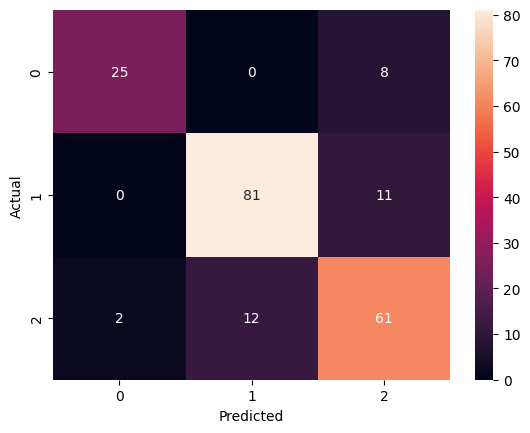

In [ ]:
m=confusion_matrix(y_test, y_pred)
sns.heatmap(m, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred= model.predict(X_test)
dict_metrics={}
dict_metrics["accuracy"] = accuracy_score(y_test, y_pred)
dict_metrics["precision"] = precision_score(y_test, y_pred, average="weighted")
dict_metrics["recall"] = recall_score(y_test, y_pred, average="weighted")
dict_metrics["f1_score"] = f1_score(y_test, y_pred, average="weighted")
dict_metrics

{'accuracy': 0.61,
 'precision': 0.5992464815832875,
 'recall': 0.61,
 'f1_score': 0.6007090431661563}

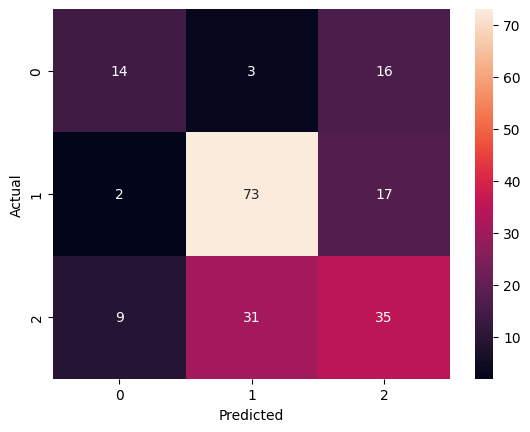

In [ ]:
m=confusion_matrix(y_test, y_pred)
sns.heatmap(m, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Conclusion:**

The analysis demonstrates that both the Random Forest and Linear Support Vector Machine models are suitable for predicting diabetes risk on this dataset, significantly outperforming a linear Logistic Regression model. The insights from the correlation analysis and the model evaluations suggest the presence of non-linear relationships that these models were able to capture. Further work could involve hyperparameter tuning, exploring other advanced models, or gathering more data to potentially improve prediction accuracy.